## Programming Assignment 5
#### In this assignment, you will be implementing Tomasi-Kanade	Factorization algorithm	for Rigid Structure from Motion.

### Task 1
#### Load the data file and generate a 2D image dataset	by generating an orthographic camera with optical axis paralle to the XY plane, which rotates around the teapot	in 10° increments and always looks towards the center of the object
#### Note: Code for loading the point cloud and visualizing it has been given to you. Further build on it and take images of the teapot and visualize them

In [229]:
from scipy.io import loadmat
x = loadmat('teapot.mat')
import numpy as np
import math

In [230]:
a = []
b = []
c = []
for points in x['verts']:
    a.append(points[0])
    b.append(points[1])
    c.append(points[2])


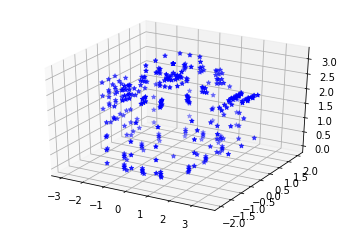

In [231]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a,b,c, c='b', marker='*')

In [237]:
### Your implementation comes here
intrinsic = np.array([[1, 0, 0],[0, 1, 0]])
F=[]

def rotation_matrix_y(angle):
    rot_angle=math.radians(angle)
    R = np.array([[math.cos(rot_angle),0,math.sin(rot_angle)],[0,1,0],[-math.sin(rot_angle),0,math.cos(rot_angle)]])
    return R 

#for i in range(20):
matrix=[]



for i in range(36):
    R_matrix= rotation_matrix_y(10+(10*i))
    R= intrinsic @ R_matrix
    matrix.extend(R)
    
matrix= np.array(matrix)

points= x['verts'].T







In [238]:
### Your implementation comes here
# Hint: new2Dpts = K[R|T]*3DPoints


### Task 2
#### Use the data generated in previous task to generate a W matrix, and use that as input in Tomasi Kanade Factorization method to compute the 3D structure

In [239]:
### Your implementation for Tomasi Kanade Factorization method comes here\
W= matrix @ points


#print(W.shape)
U, S , V  = np.linalg.svd( W , full_matrices=True )

U= U[:, :3]
S= S[0:3]
V= V[:3,]

R1= U

A=[]
B=[]
for i in range(0, R1.shape[0], 2):
    r1,r2,r3=R1[i]
    r4,r5,r6= R1[i+1]
    A.append([r1*r1 ,2*r1*r2, 2*r1*r3, r2*r2 , 2*r2*r3 , r2*r3])
    A.append([r1*r4, r2*r4+ r1*r5,r3*r4 + r1*r6, r2*r5, r2*r6 + r3*r5, r3*r6 ])
    A.append([r3*r4, 2*r5*r4, 2*r6*r4, r5*r5, 2*r6*r5, r6*r6])
    B.append(1)
    B.append(0)
    B.append(1)

A = np.array(A)
B= np.array(B)
A.shape

QQT= np.linalg.inv(A.T @ A) @ A.T @ B

q1,q2,q3,q4,q5,q6 =QQT
QT= np.array([[q1,q2,q3], [q2,q4,q5], [q3,q5,q6]])

Q=  np.linalg.cholesky(QT)


S1= np.linalg.inv(Q) @ V




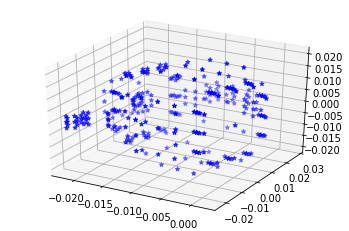

In [240]:
## Plot the reconstructed mode

# In the base code above we copied the x, y and z component of the 3D points
# in teapot 3D model that we loaded from teapot.mat in variables a, b, and c respectively
# Assuming the x, y and z component of the reconstructed 3D points are 
# in variables a1, b1 and c1 respectively, the reconstructed model can be plotted as:
a1= S1[0,:]
b1= S1[1,:]
c1= S1[2,:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1,b1,c1, c='b', marker='*')

In [241]:
## Evaluate your reconstruction
# In the base code above we copied the x, y and z component of the 3D points
# in teapot 3D model that we loaded from teapot.mat in variables a, b, and c respectively
# Assuming the x, y and z component of the 3D points that you have reconstructed are 
# in variables a1, b1 and c1 respectively, the error in reconstruction can be calcualted as:

err = 0.0
j = 0
for i in range(len(a1)):
  err = err + math.sqrt( ((a1[i]-a[i])*(a1[i]-a[i])) + ((b1[i]-b[i])*(b1[i]-b[i])) + ((c1[i]-c[i])*(c1[i]-c[i])) )
  j=j+1
  
print ("Mean Euclidean Error : ",(err/j))

Mean Euclidean Error :  2.6649614609170853
